In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('bio-5.csv')

In [3]:
x=df.drop(columns='pIC50')
x.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x.to_csv('bio-6.csv')

In [5]:
y=df['pIC50']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)
x.shape


(1079, 160)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error

rf_bootstrap = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=42)
rf_bootstrap.fit(x_train, y_train)


rf_no_bootstrap = RandomForestRegressor(n_estimators=500, bootstrap=False, random_state=42)
rf_no_bootstrap.fit(x_train, y_train)


y_pred_bootstrap = rf_bootstrap.predict(x_test)
y_pred_no_bootstrap = rf_no_bootstrap.predict(x_test)


mse_bootstrap = mean_squared_error(y_test, y_pred_bootstrap)
mse_no_bootstrap = mean_squared_error(y_test, y_pred_no_bootstrap)

print(f"Mean Squared Error with bootstrap sampling: {mse_bootstrap:.2f}")
print(f"Mean Squared Error without bootstrap sampling: {mse_no_bootstrap:.2f}")


Mean Squared Error with bootstrap sampling: 0.18
Mean Squared Error without bootstrap sampling: 0.33


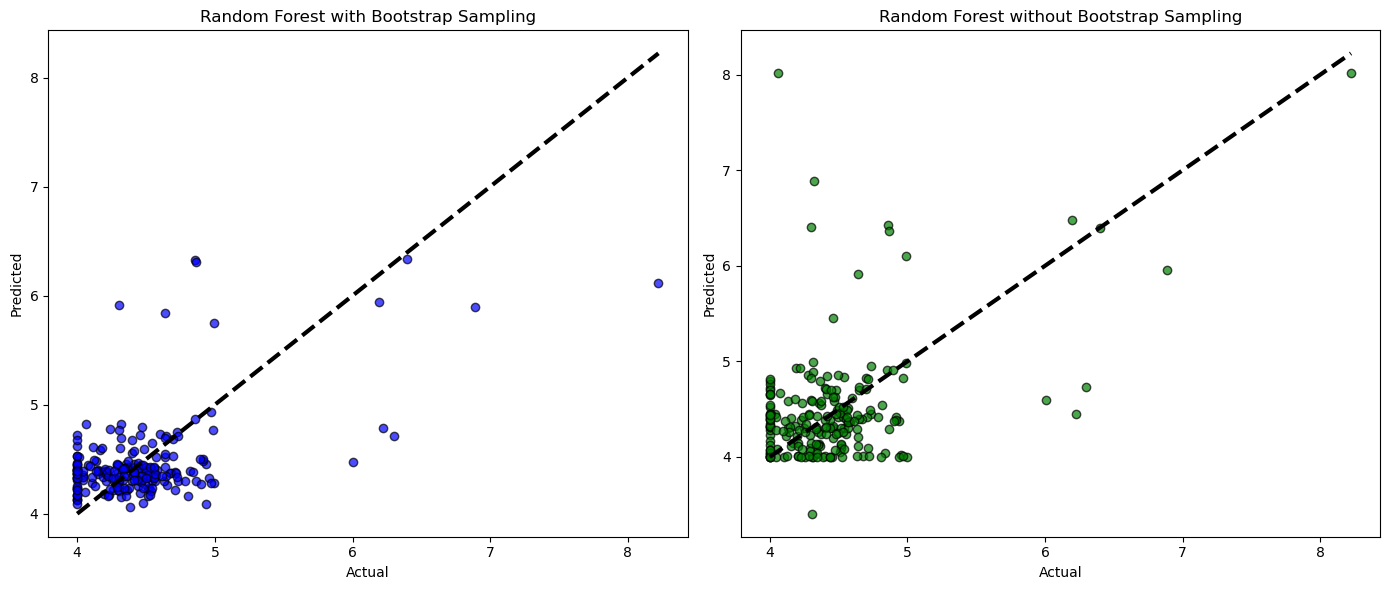

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# Plot for bootstrap sampling
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_bootstrap, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Random Forest with Bootstrap Sampling')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for no bootstrap sampling
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_no_bootstrap, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Random Forest without Bootstrap Sampling')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [11]:
import pickle

In [12]:
pickle.dump(rf_bootstrap,open('degue_prediction_model.pkl','wb'))